In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: xlabel='Amount'>

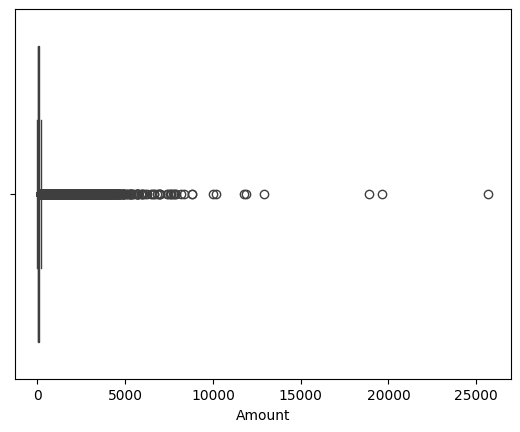

In [4]:
sns.boxplot(data=df,x='Amount')

In [5]:
q1=df['Amount'].quantile(0.25)
q3=df['Amount'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['Amount']>=lb)&(df['Amount']<=ub)]

In [6]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
x=df.drop('Class',axis=1)
y=df['Class']

In [7]:
scaler=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
classifier=RandomForestClassifier(n_estimators=10,random_state=42)
classifier.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 99.94464324548744%


<Axes: >

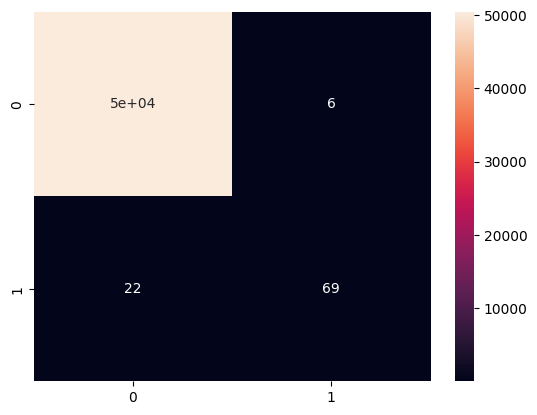

In [9]:
y_pred=classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}%")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [10]:
dt=DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=4)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 99.93475811075305%


<Axes: >

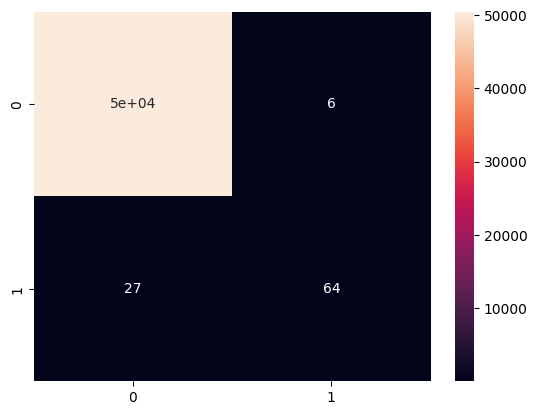

In [11]:
y_pred=dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}%")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

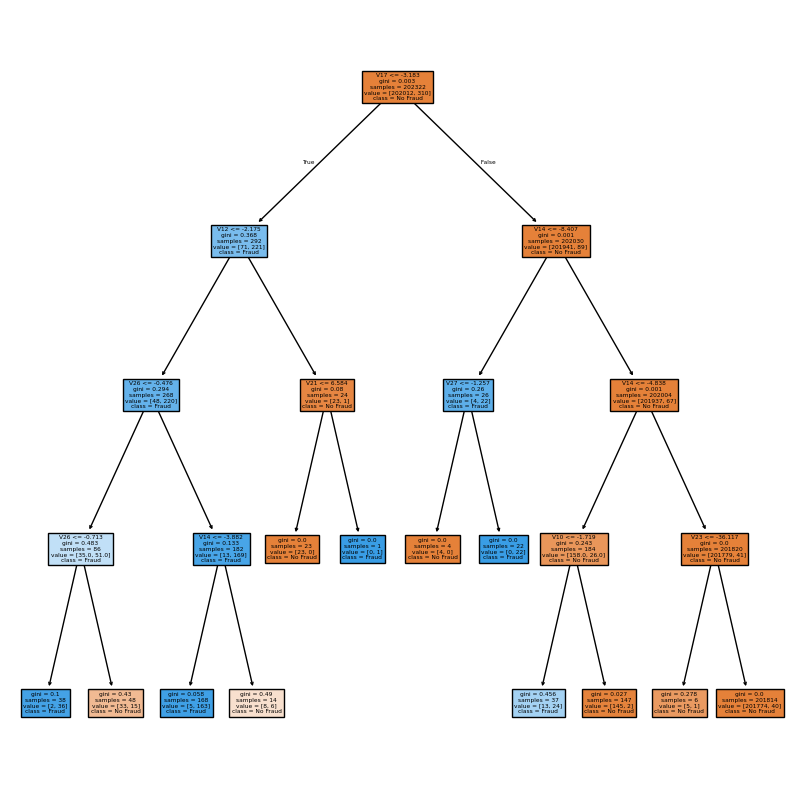

In [13]:
plt.figure(figsize=(10,10))
plot_tree(dt,filled=True,feature_names=x.columns,class_names=['No Fraud','Fraud'])
plt.show()

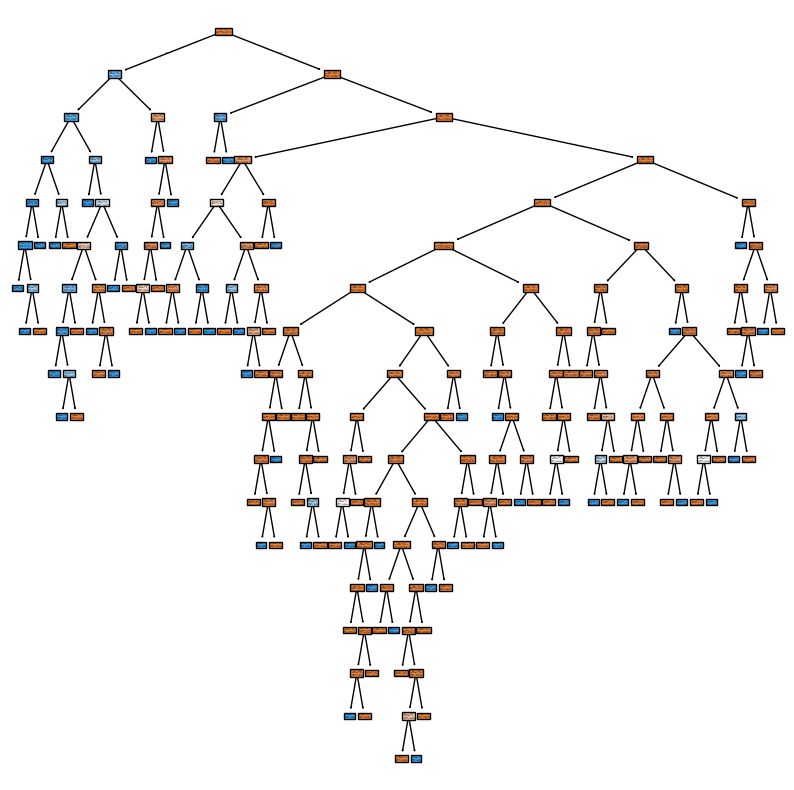

In [14]:
plt.figure(figsize=(10,10))
plot_tree(classifier.estimators_[0],filled=True,feature_names=x.columns,class_names=['No Fraud','Fraud'])
plt.show()